In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

%matplotlib inline

In [10]:
trk_filename = "./test_track_data.fits" # Replace with your filename, including it's full path
out_filename = "./test_track_full_frame2.fits" # Replace with where you want the file to be saved and it's new name

In [11]:
# Read in the TRACK image and get it's header
trk_image, trk_header = fits.getdata(trk_filename, header=True)

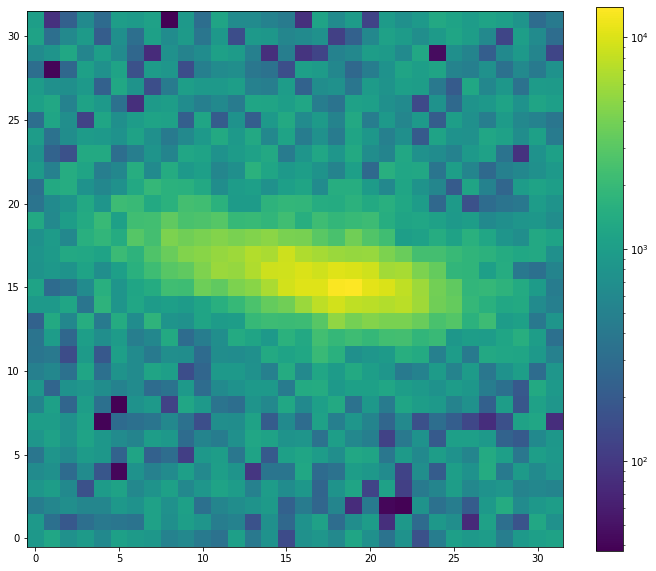

In [12]:
# Plot the first frame in the TRACK cube
plt.figure(figsize=(12, 10))
plt.imshow(trk_image[0], norm=LogNorm(), origin='lower') 
plt.colorbar()
plt.show()

Make a full size (2048x2048) image with the first frame of the track image cube

In [13]:
# Pad the TRACK image to a 2048x2048 sized image
trk_window = trk_image.shape[1] # This should be 32
print("Trk window size: {}".format(trk_window))
full_window = 2048

Trk window size: 32


In [14]:
trk_full_image = np.pad(trk_image[0], pad_width=((full_window//2) - (trk_window//2)), mode='constant')

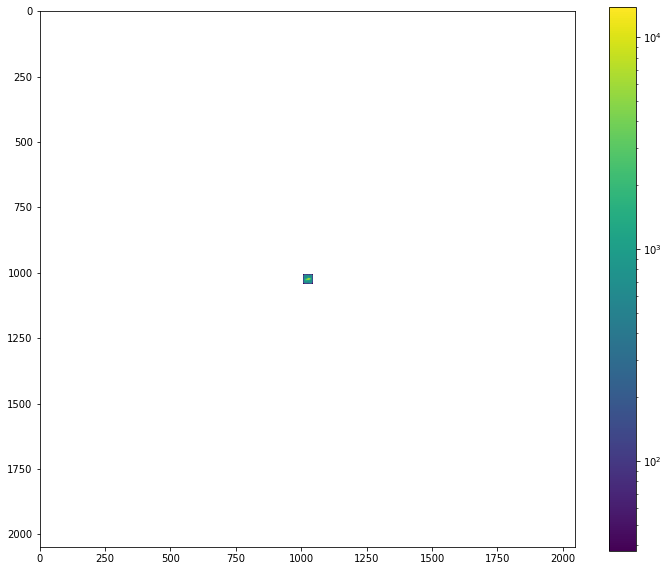

In [15]:
# Plot the padded image to make sure it looks good
plt.figure(figsize=(12, 10))
plt.imshow(trk_full_image, norm=LogNorm()) 
plt.colorbar()
plt.show()

In [16]:
hdul = fits.PrimaryHDU(data=trk_full_image, header=trk_header)

hdul.writeto(out_filename, overwrite=True) 